In [38]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In our dataproject we look at GDP per capita and population in the major regions of the world in the period 1970-2015. We look at the growth rates that the regions have experinced in the period, and do our best to explain why we see the patterns that exist. We start out showing the development of GDP per capita and population in levels, then move on to show the relative development and finally we show 5-year growth rates.

First we import python packages:

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from pandas_datareader import wb

We define the regions that we are going to use in our dataproject:

In [40]:
regions = ['WLD', 'TSA', 'TMN', 'ECS', 'SSF', 'NAC', 'LCN','TEA']

We now download GDP and population data for the period 1970-2015 from the World Bank:

In [41]:
pop = wb.download(indicator='SP.POP.TOTL', country=regions, start=1970, end=2015)
gdp = wb.download(indicator='NY.GDP.MKTP.KD', country=regions, start=1970, end=2015)

Here we merge and rename the imported variables from the World Bank:

In [42]:
merged = pd.merge(gdp,pop, how='inner', on=['country','year'])
merged = merged.reset_index()
merged = merged.rename(columns = {'country' : 'region', 'NY.GDP.MKTP.KD' : 'gdp', 'SP.POP.TOTL' : 'pop'})

First we change the type of the variable "year" from obejct to float, as this makes it possible for us to show the year ticks on the x-axis in our figures. We then generate GDP per capita, as this is a better measure of welfare than GDP, as it takes population size into account:

In [43]:
merged['year'] = merged.year.astype(float)
merged['gdp_cap'] = merged['gdp'] / merged['pop']

Here we sort the data on region and year, as we want 1970 to be the first observation for a given region:

In [44]:
merged.sort_values(by=['region','year'], inplace=True)
merged = merged.reset_index(drop = True)

We now want to look at the development of GDP per capita and the population in different regions. Below you find a dropdown menu, where you can choose a region. The figure to the left shows the development of GDP per capita (constant 2010 US dollars) in the period 1970-2015 for the chosen region. The figure to the right shows the development of the population (100 millions) in the same period.

Overall we see, that regions have experienced an increase in GDP per capita between the two years (this is clear if "World" is chosen in the dropdown menu). The same holds for the poppulation, which also have increased for each country in the period. From this we can say that all regions must have experienced a higher growth rate in GDP compared to the growth rate in the population.

We see, that the regions have experienced different growth patterns in the development of GDP per capita. If we look at East Asia & Pacific, we see that this region has experienced an exponential increase in the GDP per capita and an increasing population with decreasing acceleration. South Asia has also experienced the same trend in GDP per capita in the period. The exponential increase in GDP per capita is primarily due to the growth of the tiger economies.

Looking at the region "Middle East & North Africa", we see that GDP per capita has experienced great fall in the 1970's, which can be due to the aftermath of the oil crises in the period. When looking at the region "Sub-Saharan Africa", we see that GDP per capita has experienced a fall in the period 1980-1995, and a sudden large increase in the following 20 years. We also notice, that the population has increased exponentially in this region, which with regard to the population, distincts this region from the others.

For the rest of the regions, we see more or less the same trends in the development of GDP per capita and population.

In [45]:
def plot1(dataframe, region):
    I = dataframe['region'] == region
    fig1, ax = plt.subplots(ncols=2, figsize=(16,6))
    ax_gdp = dataframe.loc[I,:].plot(x = 'year', y = 'gdp_cap', legend = False, ax=ax[0])
    ax_pop = dataframe.loc[I,:].plot(x = 'year', y = 'pop', legend = False, ax=ax[1])
    ax_gdp.set_ylabel('GDP per capita', fontsize=15)
    ax_pop.set_ylabel('Population', fontsize=15)
    ax_gdp.set_xlabel('Year', fontsize=15)
    ax_pop.set_xlabel('Year', fontsize=15)
    ax_gdp.set_title("Figure 1:\nGDP per capita 1970-2015 in constant 2010 $US")
    ax_pop.set_title("Figure 2: \nPopulation 1970-2015 in 100 millons")

# Creates widget:
widgets.interact(plot1, 
    dataframe = widgets.fixed(merged),
    region = widgets.Dropdown(description='region', options=merged.region.unique(), value='Europe & Central Asia')
);

interactive(children=(Dropdown(description='region', index=1, options=('East Asia & Pacific (IDA & IBRD countr…

We now want to compare the regions with each other, with regards to yearly growth in GDP per capita and population. To do this, we use indexing, where we normalize the GDP per capita and population to 1 in 1970. This gives us an opportunity to see the growth in GDP per capita and population over time.

In [46]:
# Create a series consisting of first value for gdp and population:
merged_grouped = merged.groupby('region')
merged_grouped_first_gdp = merged_grouped.gdp_cap.first()
merged_grouped_first_gdp.name = 'first_gdp'
merged_grouped_first_pop = merged_grouped.pop.first()
merged_grouped_first_pop.name = 'first_pop'

merged.set_index(['region','year'],inplace=True)
merged = merged.join(merged_grouped_first_gdp)
merged = merged.join(merged_grouped_first_pop)
merged.reset_index(inplace=True)

# Create index:
merged['indexed_gdp'] = merged['gdp_cap']/merged['first_gdp']
merged['indexed_pop'] = merged['pop']/merged['first_pop']

In the figure 3 we have indexed GDP per capita to 1 in 1970 for each region. From the figure it is clear, that East Asia & pacific has seen the largest increase in GDP per capita (around 1,600%) in the period 1970-2015. We also see that South Asia has quadrupled its GDP per capita in the period, while the world as whole has seen a double of its GDP per capita in the same period. This corresponds to an average yearly increase in the world GDP per capita of around 1,55% (72/45), when using the 72-year thumb rule. Sub-Saharan Africa has seen the lowest growth rate in GDP per capita in the period.

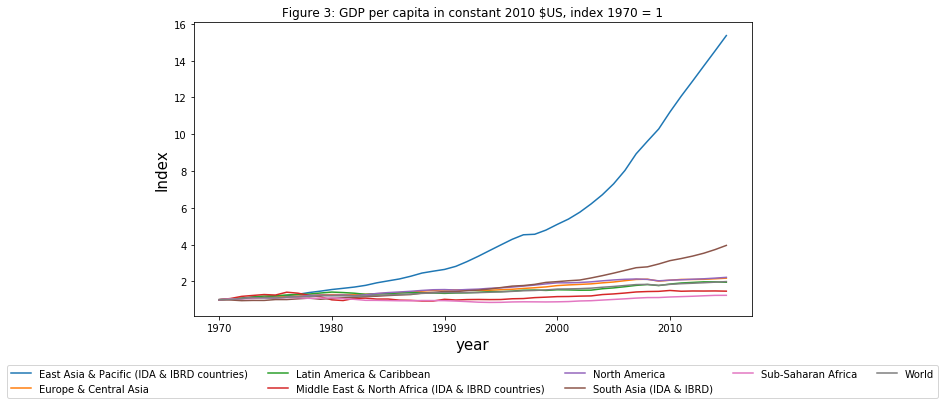

In [47]:
fig_indexed = plt.figure(figsize=(10,6))
fig_indexed = plt.subplot(111)
merged.set_index('year').groupby('region')['indexed_gdp'].plot(legend=True)
fig_indexed.set_ylabel('Index', fontsize=15)
fig_indexed.set_xlabel('year', fontsize=15)
fig_indexed.set_title('Figure 3: GDP per capita in constant 2010 $US, index 1970 = 1')
box = fig_indexed.get_position()
fig_indexed.set_position([box.x0, box.y0 + box.height * 0.1,box.width, box.height * 0.9])
fig_indexed.legend(loc='upper center', bbox_to_anchor = (0.5, -0.15),ncol=5);

In figure 4 below we have indexed population to 1 in 1970 for each region. We see, that Sub-Saharan Africa has increased its population size with a factor of 3.5 in the period 1970-2015. This could be a reason for Sub-Saharan Africa to have a low growth in GDP per capita, which we saw in the figure above.

We also see that the Europe & Central Asia has experinced a flat out of the development in the population growth, which is due to a low fertility rate in this region. The kink point is placed at 1990 for Europe & Central Asia. The same form of change in the slope is also seen for East Asia & Pacific in 2000, which could be due to a delayed introduction of the fertility transition in this region. We know that Japan is know for having a low population growth rate, while China has been using laws prohibiting more than one child.

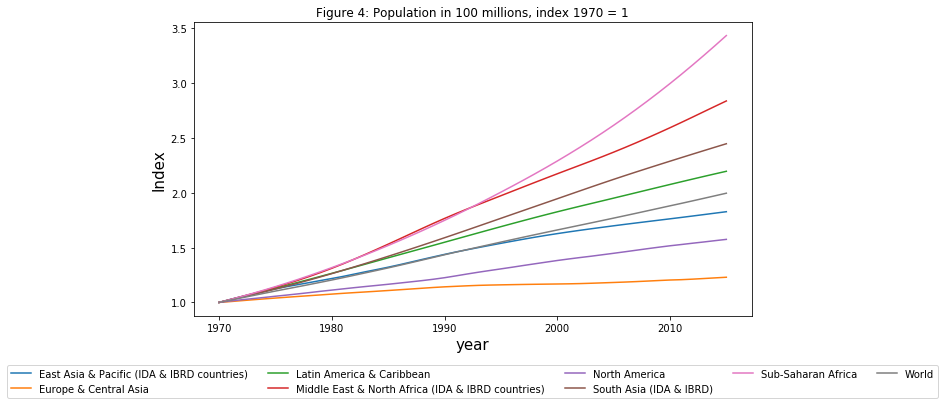

In [48]:
fig_indexed = plt.figure(figsize=(10,6))
fig_indexed = plt.subplot(111)
merged.set_index('year').groupby('region')['indexed_pop'].plot(legend=True)
fig_indexed.set_ylabel('Index', fontsize=15)
fig_indexed.set_xlabel('year', fontsize=15)
fig_indexed.set_title('Figure 4: Population in 100 millions, index 1970 = 1')
box = fig_indexed.get_position()
fig_indexed.set_position([box.x0, box.y0 + box.height * 0.1,box.width, box.height * 0.9])
fig_indexed.legend(loc='upper center', bbox_to_anchor = (0.5, -0.15),ncol=5);

We have now seen the figures showing the development of GDP per capita and population in levels and compared the growth in GDP per capita and population between the regions over time. We now turn to 5-year growth rates in these variables in the period 1970-2015.

First we create 5-year growth rates in GDP per capita and population:

In [49]:
merged_5 = merged[merged['year'].isin(['1970','1975','1980','1985','1990','1995','2000','2005','2010','2015'])]
merged_5.set_index(['region','year'],inplace=True)
merged_5_grouped = merged_5.groupby('region')
merged_5_change_gdp = merged_5_grouped.gdp_cap.pct_change()*100
merged_5_change_gdp.name = 'growth_5_gdp'
merged_5_change_pop = merged_5_grouped.pop.pct_change()*100
merged_5_change_pop.name = 'growth_5_pop'

merged_5 = merged_5.join(merged_5_change_gdp)
merged_5 = merged_5.join(merged_5_change_pop)
merged_5.reset_index(inplace=True)
merged_5 = merged_5[merged_5['year'].isin(['1975','1980','1985','1990','1995','2000','2005','2010','2015'])]

The figure to the left shows the 5-year growth rate in GDP per capita for the chosen region, and the figure to the right shows the corresponding 5-year growth rate in the population. Note that e.g. year 1975 means the growth from 1970-1975 and so on.

The left figure shows, that GDP per capita has experienced positive 5-year growth rates for all intervals, except "Middle East & North Africa", "Latin America & Caribbean" and "Sub-Saharan Africa", which have seen negative growth rates in some of the 5-year intervals. The negative growth rates in GDP per capita is due to war conflicts, debt crises and politcal unrest. 

We see, that the 5-year population growth rate has been experiencing a downward trend in the whole period for all regions except Sub-Sahran Africa. The downward trend is due to the fertility transition, where mortality and fertility rates started falling. Though, we see that 5-year growth rates in the popualtion are always positive, meaning population in total has been increasing in all 5-year intervals for all regions.

In [50]:
def plot2(dataframe, region):
    I = dataframe['region'] == region
    fig2, ax = plt.subplots(ncols=2, figsize=(15,6))
    ax_growth5_gdp = dataframe.loc[I,:].plot.bar(x = 'year', y = 'growth_5_gdp', legend = False, ax=ax[0])
    ax_growth5_pop = dataframe.loc[I,:].plot.bar(x = 'year', y = 'growth_5_pop', legend = False, ax=ax[1])
    ax_growth5_gdp.set_ylabel('Growth in pct.', fontsize=15)
    ax_growth5_gdp.set_xlabel('5-year period', fontsize=15)
    ax_growth5_pop.set_ylabel('Growth in pct.', fontsize=15)
    ax_growth5_pop.set_xlabel('5-year period', fontsize=15)
    ax_growth5_gdp.set_title("Figure 5 \n5-year growth rate in GDP per capita, 1970-2015 constant 2010 $US")
    ax_growth5_pop.set_title("FIgure 6 \n5-year growth rate in population, 1970-2015 in 100 millons")

# Creates widget:
widgets.interact(plot2, 
    dataframe = widgets.fixed(merged_5),
    region = widgets.Dropdown(description='region', options=merged_5.region.unique(), value='Europe & Central Asia')
);

interactive(children=(Dropdown(description='region', index=1, options=('East Asia & Pacific (IDA & IBRD countr…

## Conclusion

From our dataproject we can conclude that different regions in the world have experienced different growth rates in GDP and in the population. This has to do with the timing of the fertility transition in the different regions and cultural differences, which could have affected the development in the GDP and the population growth rate.